In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [37]:
data = pd.read_csv('./dataset/Automobile_data.csv')

In [38]:
data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

**Hapus Kolom yang tidak akan digunakan agar terlihat lebih simpel**

In [40]:
new_data = data[['engine-size','bore','highway-mpg','price']]

In [41]:
new_data

,engine-size,bore,highway-mpg,price
0,130,3.47,27,13495
1,130,3.47,27,16500
2,152,2.68,26,16500
3,109,3.19,30,13950
4,136,3.19,22,17450
...,...,...,...,...
200,141,3.78,28,16845
201,141,3.78,25,19045
202,173,3.58,23,21485
203,145,3.01,27,22470


**Cek value '?' pada dataframe**

In [42]:
new_data.isin(['?']).any()

engine-size    False
bore            True
highway-mpg    False
price           True
dtype: bool

**Menghapus value yang tidak diinginkan**

In [43]:
new_data = new_data[new_data.isin(['?']) == False]

**Mengubah format dtype menjadi float**

In [45]:
new_data = new_data.astype(float)

In [46]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   engine-size  205 non-null    float64
 1   bore         201 non-null    float64
 2   highway-mpg  205 non-null    float64
 3   price        201 non-null    float64
dtypes: float64(4)
memory usage: 6.5 KB


**Menghapus null value**

In [52]:
new_data.isna().sum()

engine-size    0
bore           4
highway-mpg    0
price          4
dtype: int64

In [55]:
new_data = new_data.dropna()

# **engine-size vs price**

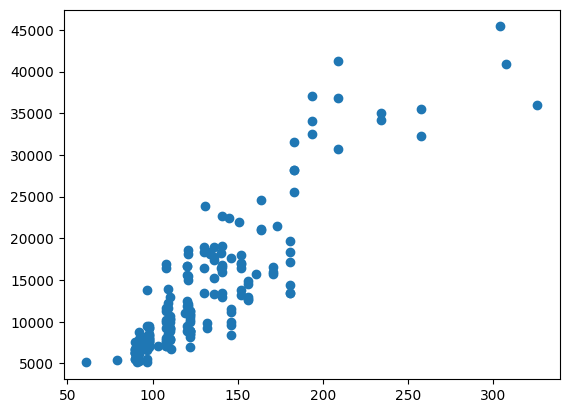

In [60]:
plt.scatter(new_data['engine-size'], new_data['price'])

Grafik diatas menunjukkan korelasi positif dengan adanya kenaikan secara teratur ke arah yang sama dan terlihat kuat karena penyebaran titik - titiknya terlihat membentuk satu garis lurus

In [63]:
corr, _ = pearsonr(new_data['engine-size'], new_data['price'])
print('korelasi pearson: %.3f' % corr)

korelasi pearson: 0.888


# **bore vs price**

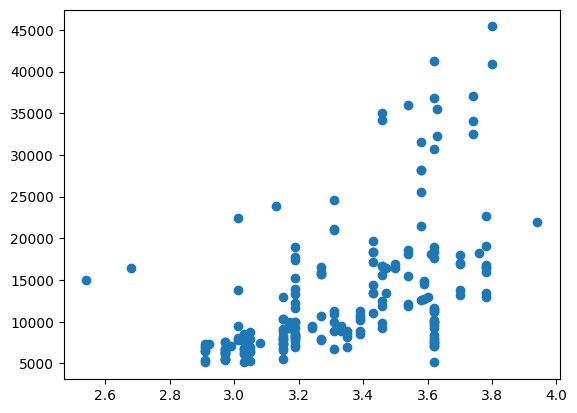

In [58]:
plt.scatter(new_data['bore'], new_data['price'])

Grafik diatas menunjukkan korelasi positif dengan adanya kenaikan secara teratur ke arah yang sama namun terlihat lemah atau samar karena titik - titik yang bersebaran tidak terlihat dalam satu garis. 

In [61]:
corr, _ = pearsonr(new_data['bore'], new_data['price'])
print('korelasi pearson: %.3f' % corr)

korelasi pearson: 0.543


# **highway-mpg vs price**

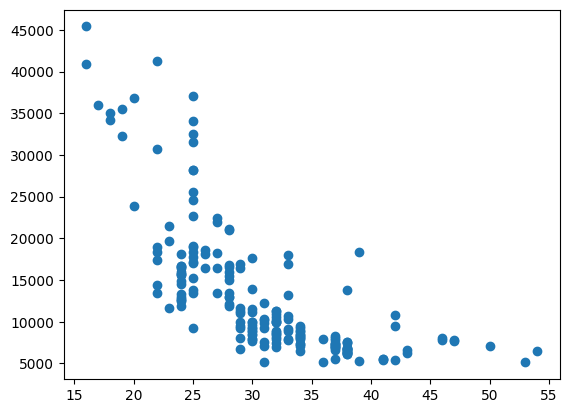

In [65]:
plt.scatter(new_data['highway-mpg'], new_data['price'])

Grafik diatas menunjukkan korelasi negatif dengan adanya penurunan secara teratur ke arah yang sama dan terlihat cukup kuat tapi tidak sekuat antara engine-size vs price yang penyebaran titik - titiknya terlihat membentuk garis

In [66]:
corr, _ = pearsonr(new_data['highway-mpg'], new_data['price'])
print('korelasi pearson: %.3f' % corr)

korelasi pearson: -0.715
